# **Importing the Required Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import requests

# **Getting the Data**
### I used the data from covidtracking.com
### URL: http://covidtracking.com/api/states/daily.csv

In [5]:
data = pd.read_csv("daily.csv")
data.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210211,AK,54134.0,NaN,NaN,NaN,totalTestsViral,1577356.0,33.0,1227.0,...,54134,0,3,9bde9e7688ef2df020f5194474be7cce451af917,0,0,0,0,0,NaN
1,20210211,AL,477570.0,102824.0,1836625.0,NaN,totalTestsPeopleViral,2211371.0,1281.0,43906.0,...,2314195,133,221,243e7ec9a9859fad20d054cd855496c6af9e9a5f,0,0,0,0,0,NaN
2,20210211,AR,311043.0,64454.0,2316686.0,NaN,totalTestsViral,2563275.0,712.0,14255.0,...,2627729,25,44,43a63659cb0009325dbe62edbddf8d30e632f740,0,0,0,0,0,NaN
3,20210211,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,2140,0,0,f9af3096de9a7a18426442a07acd27ac851f35e6,0,0,0,0,0,NaN
4,20210211,AZ,791106.0,52978.0,2855265.0,NaN,totalTestsViral,7105696.0,2507.0,55272.0,...,3646371,200,184,edf01773882f81a0ff47a4fd11097f5b24b3b5d3,0,0,0,0,0,NaN


## **Basic data information**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19429 entries, 0 to 19428
Data columns (total 55 columns):
date                           19429 non-null int64
state                          19429 non-null object
positive                       19240 non-null float64
probableCases                  8354 non-null float64
negative                       15469 non-null float64
pending                        2019 non-null float64
totalTestResultsSource         19429 non-null object
totalTestResults               19327 non-null float64
hospitalizedCurrently          16066 non-null float64
hospitalizedCumulative         11979 non-null float64
inIcuCurrently                 10526 non-null float64
inIcuCumulative                3504 non-null float64
onVentilatorCurrently          8354 non-null float64
onVentilatorCumulative         1197 non-null float64
recovered                      13948 non-null float64
dataQualityGrade               18093 non-null object
lastUpdateEt                   18844 

## **Cleaning Data**

In [7]:
data['date'] =  pd.to_datetime(data['date'], format='%Y%m%d')

In [8]:
data['state']=data['state'].apply(str)

In [9]:
data.drop(['dateChecked'],axis=1,inplace=True)
data.drop(['lastUpdateEt'],axis=1,inplace=True)
data.drop(['checkTimeEt'],axis=1,inplace=True)

In [10]:
data.fillna(value=-1, inplace=True)

In [11]:
data.head(10)

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2021-02-11,AK,54134.0,-1.0,-1.0,-1.0,totalTestsViral,1577356.0,33.0,1227.0,...,54134,0,3,9bde9e7688ef2df020f5194474be7cce451af917,0,0,0,0,0,-1.0
1,2021-02-11,AL,477570.0,102824.0,1836625.0,-1.0,totalTestsPeopleViral,2211371.0,1281.0,43906.0,...,2314195,133,221,243e7ec9a9859fad20d054cd855496c6af9e9a5f,0,0,0,0,0,-1.0
2,2021-02-11,AR,311043.0,64454.0,2316686.0,-1.0,totalTestsViral,2563275.0,712.0,14255.0,...,2627729,25,44,43a63659cb0009325dbe62edbddf8d30e632f740,0,0,0,0,0,-1.0
3,2021-02-11,AS,0.0,-1.0,2140.0,-1.0,totalTestsViral,2140.0,-1.0,-1.0,...,2140,0,0,f9af3096de9a7a18426442a07acd27ac851f35e6,0,0,0,0,0,-1.0
4,2021-02-11,AZ,791106.0,52978.0,2855265.0,-1.0,totalTestsViral,7105696.0,2507.0,55272.0,...,3646371,200,184,edf01773882f81a0ff47a4fd11097f5b24b3b5d3,0,0,0,0,0,-1.0
5,2021-02-11,CA,3371556.0,-1.0,-1.0,-1.0,totalTestsViral,44923981.0,11045.0,-1.0,...,3371556,461,0,f091a3e6af96760137eeda5aec9619ad326d506c,0,0,0,0,0,-1.0
6,2021-02-11,CO,409683.0,21392.0,2090025.0,-1.0,totalTestEncountersViral,5756150.0,507.0,22655.0,...,2499708,11,39,830cfe65a9f868605d2c47ec257869a822f09d4d,0,0,0,0,0,-1.0
7,2021-02-11,CT,266499.0,16368.0,5910201.0,-1.0,posNeg,6176700.0,731.0,12257.0,...,6176700,28,0,943ae7afd6cc6ef9937d74ad5f4085c9ad0f9e69,0,0,0,0,0,-1.0
8,2021-02-11,DC,38533.0,-1.0,-1.0,-1.0,totalTestEncountersViral,1151484.0,225.0,-1.0,...,38533,8,0,17678b54e1bc8b5ec53371c4cefae81cd79a370f,0,0,0,0,0,-1.0
9,2021-02-11,DE,81875.0,4138.0,520461.0,-1.0,totalTestEncountersViral,1293220.0,253.0,-1.0,...,602336,17,0,297e1e1daaa62a18ba2b93c924f2e6b35e522b2f,0,0,0,0,0,-1.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19429 entries, 0 to 19428
Data columns (total 52 columns):
date                           19429 non-null datetime64[ns]
state                          19429 non-null object
positive                       19429 non-null float64
probableCases                  19429 non-null float64
negative                       19429 non-null float64
pending                        19429 non-null float64
totalTestResultsSource         19429 non-null object
totalTestResults               19429 non-null float64
hospitalizedCurrently          19429 non-null float64
hospitalizedCumulative         19429 non-null float64
inIcuCurrently                 19429 non-null float64
inIcuCumulative                19429 non-null float64
onVentilatorCurrently          19429 non-null float64
onVentilatorCumulative         19429 non-null float64
recovered                      19429 non-null float64
dataQualityGrade               19429 non-null object
dateModified           

In [13]:
data.describe()

,positive,probableCases,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,totalTestResultsIncrease,posNeg,deathIncrease,hospitalizedIncrease,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
count,1.942900e+04,19429.000000,1.942900e+04,19429.000000,1.942900e+04,19429.000000,19429.000000,19429.000000,19429.000000,19429.000000,...,19429.000000,1.942900e+04,19429.000000,19429.000000,19429.0,19429.0,19429.0,19429.0,19429.0,19429.0
mean,1.404071e+05,7300.521540,7.918961e+05,168.052396,1.889832e+06,994.939781,6447.971023,194.402285,321.462659,66.025374,...,16989.341345,9.323034e+05,23.963148,43.068094,0.0,0.0,0.0,0.0,0.0,-1.0
std,2.790041e+05,25425.348056,1.559857e+06,1606.805288,3.835266e+06,1956.546443,14206.629552,474.254945,1027.389650,159.028731,...,32906.258664,1.700277e+06,55.822696,216.589851,0.0,0.0,0.0,0.0,0.0,0.0
min,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-194215.000000,0.000000e+00,-201.000000,-4124.000000,0.0,0.0,0.0,0.0,0.0,-1.0
25%,4.414000e+03,-1.000000,1.314000e+03,-1.000000,8.210800e+04,41.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1019.000000,3.808100e+04,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-1.0
50%,3.803300e+04,-1.000000,1.718860e+05,-1.000000,5.570980e+05,367.000000,584.000000,14.000000,-1.000000,-1.000000,...,5782.000000,2.897520e+05,6.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-1.0
75%,1.528620e+05,2395.000000,8.562450e+05,-1.000000,1.954429e+06,1050.000000,6679.000000,199.000000,-1.000000,65.000000,...,18225.000000,1.027596e+06,23.000000,37.000000,0.0,0.0,0.0,0.0,0.0,-1.0
max,3.371556e+06,332461.000000,1.576308e+07,64400.000000,4.492398e+07,22851.000000,89995.000000,5225.000000,8717.000000,2425.000000,...,473076.000000,1.691891e+07,1546.000000,16373.000000,0.0,0.0,0.0,0.0,0.0,-1.0


# **Data Visualization**
## I have created functions for plotting bar charts of different variables and respective states

In [14]:
def bar_plot(var='positiveIncrease',state='NY'):
    assert type(var)==str, "Expected string as the variable name"
    assert type(state)==str, "Expected string as the state name"
 
    y = data[data['state']==state][var]
    x = data[data['state']==state]['date']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for {}".format(var,state),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='red')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

c:\users\kairavi's\appdata\local\programs\python\python36-32\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


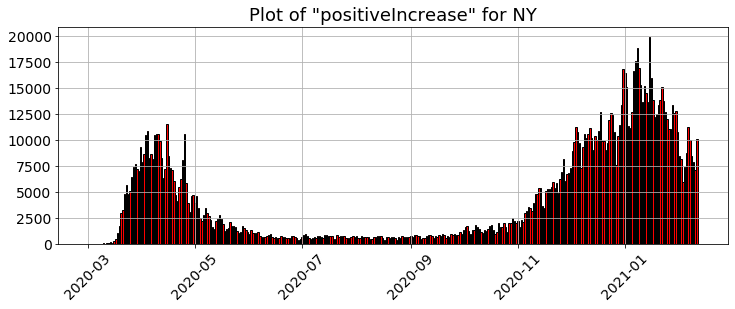

In [15]:
bar_plot('positiveIncrease','NY')

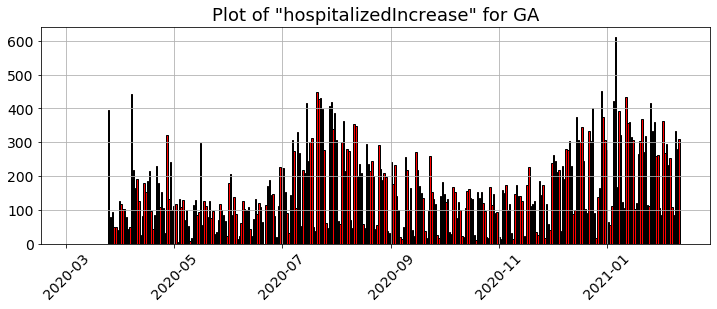

In [16]:
bar_plot('hospitalizedIncrease','GA')

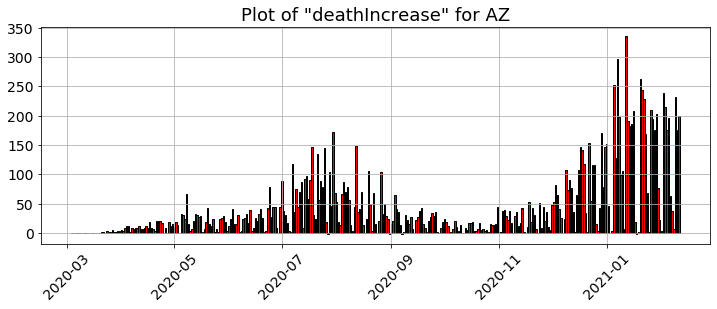

In [17]:
bar_plot('deathIncrease','AZ')

## Function of plotting a scatter plot to show relation between two attributes of one state

In [18]:
def scatter_plot(varx='totalTestResultsIncrease',vary='positiveIncrease',state='GA'):
    
    assert type(varx)==str, "Expected string as the variable x name"
    assert type(vary)==str, "Expected string as the variable y name"
 
    y = data[data['state']==state][vary]
    x = data[data['state']==state][varx]
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(16,4))
        plt.title("Plot of \"{}\" vs. \"{}\" for {}".format(varx,vary,state),fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='lightblue',s=100)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

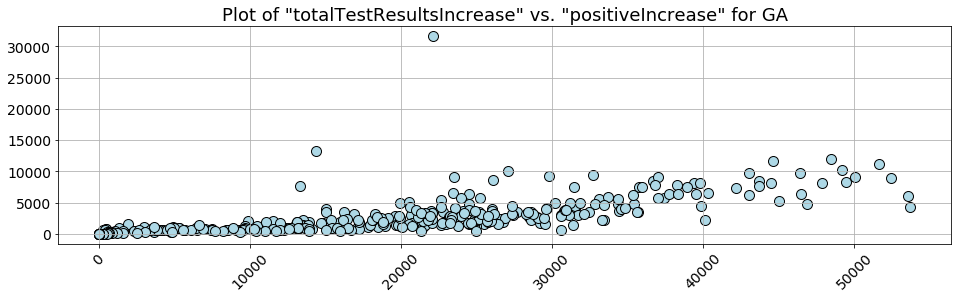

In [19]:
scatter_plot(state='GA')

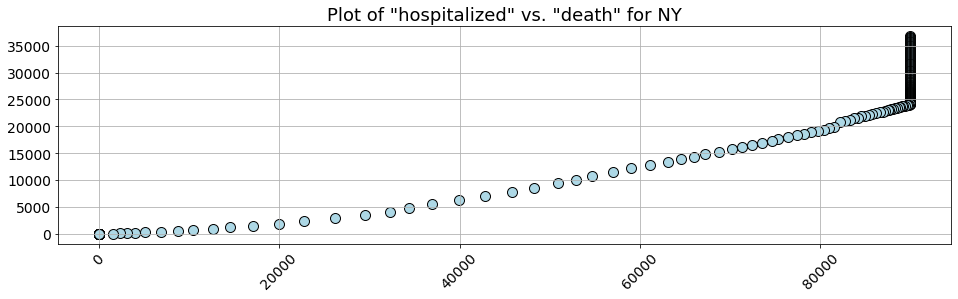

In [20]:
scatter_plot('hospitalized','death','NY')

## In this function, the number of covid tests are calculated for different staes and plotted
## The graph shows the average number of tests per day in different states

In [21]:
def testing(lst_states=['NY','CA','MA','TX','IL']):
    legends = []
    plt.figure(figsize=(16,4))
    plt.title("Total test results",fontsize=18)
    for s in lst_states:
        info = np.array(data[data['state']==s]['totalTestResults'])[-2::-2]
        slope = int((info[-1]-info[0])/len(data))
        plt.plot(info,linewidth=2)
        plt.text(x=len(info)-2,y=info[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" tests/day in " + s)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(info)+50)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total test results",fontsize=16)
    plt.show()

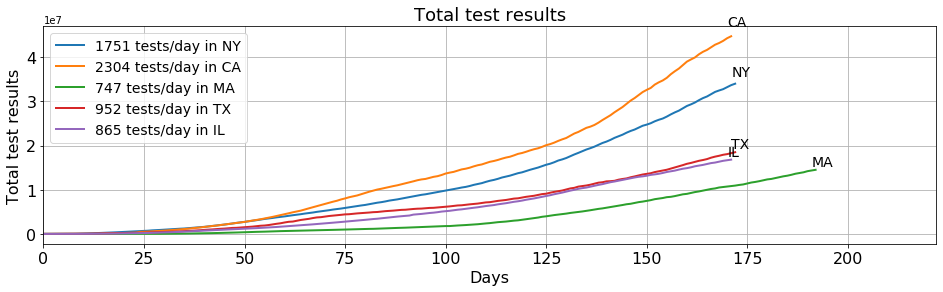

In [22]:
testing()

## Function to compute fatality ratio

In [23]:
def fatality_ratio(state='CA'):
    
    date = data.iloc[0]['date']
    try:
        d = float(data[(data['state']==state) & (data['date']==date)]['death'])
        p = float(data[(data['state']==state) & (data['date']==date)]['positive'])
    except:
        print("Information not available")
    
    if (d!=-1.0) and (p!=-1.0) and (p!=0):
        return round(d/p,3)
    else:
        return -1

In [24]:
fatality_ratio()

0.013

## Function to calculate positive to total tests ratio

In [25]:
def positiveTest_ratio(state='NY'):
    date = data.iloc[0]['date']
    try:
        p = float(data[(data['state']==state) & (data['date']==date)]['positive'])
        t = float(data[(data['state']==state) & (data['date']==date)]['totalTestResults'])
    except:
        print("Information not available")
        return -1
    
    if (p!=-1.0) and (t!=-1.0) and (t!=0):
        return round(p/t,3)
    else:
        return -1

In [26]:
positiveTest_ratio()

0.044

## Function to calculate Recovery Ratio
### This is important to see how the positive tested covid patients are recovering in different states

In [27]:
def recovery_ratio(state='MA'):
    date = data.iloc[0]['date']
    try:
        r = float(data[(data['state']==state) & (data['date']==date)]['recovered'])
        p = float(data[(data['state']==state) & (data['date']==date)]['positive'])
    except:
        print("Information not available")
        return -1
    if (r!=-1.0) and (p!=-1.0) and (p!=0):
        return round(r/p,3)
    else:
        return -1

In [28]:
recovery_ratio()

0.823

## Function to calculate hospitalization ratio

In [29]:
def hospitalization_ratio(state='NY'):
    date = data.iloc[0]['date']
    try:
        h = float(data[(data['state']==state) & (data['date']==date)]['hospitalized'])
        p = float(data[(data['state']==state) & (data['date']==date)]['positive'])
    except:
        print("Information not available")
    
    if (h!=-1.0) and (p!=-1.0) and (p!=0):
        return round(h/p,3)
    else:
        return -1

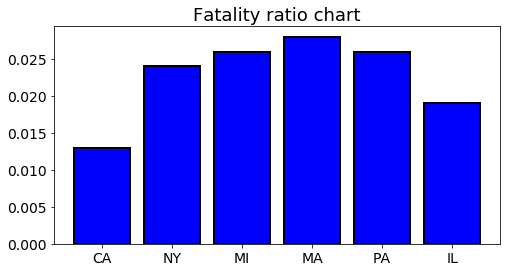

In [30]:
states = ['CA','NY','MI','MA','PA','IL']
fr,x = [],[]
for s in states:
    info = fatality_ratio(s)
    if info!=-1:
        fr.append(info)
        x.append(s)

plt.figure(figsize=(8,4))
plt.title("Fatality ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=fr,color='blue',
        edgecolor='k',linewidth=2)
plt.show()

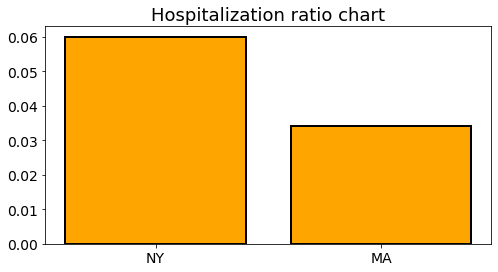

In [31]:
states = ['CA','NY','MI','MA','PA','IL']
hos,x = [],[]
for s in states:
    info = hospitalization_ratio(s)
    if info!=-1:
        hos.append(info)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Hospitalization ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=hos,color='orange',
        edgecolor='k',linewidth=2)
plt.show()

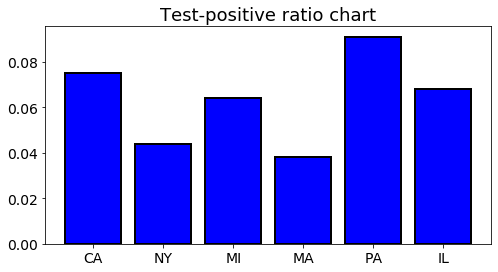

In [32]:
states = ['CA','NY','MI','MA','PA','IL']
tp,x = [],[]
for s in states:
    info = positiveTest_ratio(s)
    if info!=-1:
        tp.append(info)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Test-positive ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=tp,color='blue',
        edgecolor='k',linewidth=2)
plt.show()

## To see If there is a continous decrease in Number of cases in the past two weeks

In [33]:
def recent_decrease(days=14,state='NY'):
    
    positiveIncrease = np.array(data[data['state']==state]['positiveIncrease'][:days+1])[-1::-1]
    diff = np.diff(positiveIncrease)
    countofNeg = np.sum(diff <= 0, axis=0)
    return (countofNeg, diff)

In [34]:
recent_decrease()

(9, array([ -819,   225, -2011, -2285,  -293, -2290,  1489,  1363,  2475,
        -1227, -1577,  -582,  -765,  2998], dtype=int64))

## We see that no state has a continous decrease in the number of cases in the last 14 days

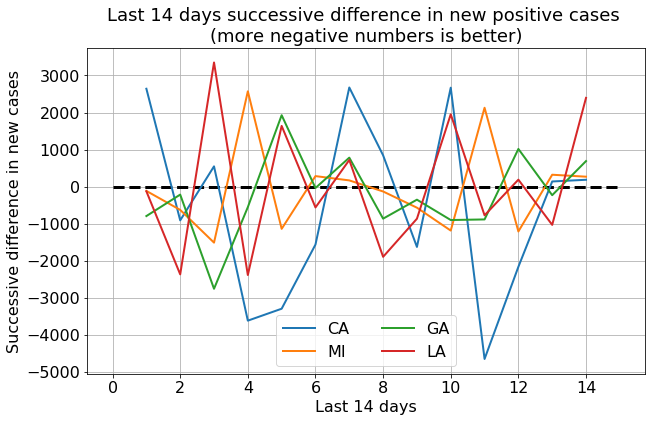

In [35]:
states = ['CA','MI','GA','LA']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,info = recent_decrease(days=14,state=s)
    plt.plot(x,info,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

# **Now, I have used another dataset to see time series variation of covid cases**

# **Importing the required libraries**

In [58]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Getting the dataset
Here I have used the dataset from the website: https://covid19.who.int/

In [36]:
df = pd.read_csv("WHO-COVID-19-global-data.csv")
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
5,2020-01-08,AF,Afghanistan,EMRO,0,0,0,0
6,2020-01-09,AF,Afghanistan,EMRO,0,0,0,0
7,2020-01-10,AF,Afghanistan,EMRO,0,0,0,0
8,2020-01-11,AF,Afghanistan,EMRO,0,0,0,0
9,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0


# EDA on the dataset

In [38]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

In [39]:
df_dates = df.groupby('Date_reported').sum()
df_dates

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,
2020-01-03,0,0,0,0
2020-01-04,1,1,0,0
2020-01-05,0,1,0,0
2020-01-06,3,4,0,0
2020-01-07,0,4,0,0
2020-01-08,0,4,0,0
2020-01-09,0,4,0,0
2020-01-10,0,4,0,0
2020-01-11,41,45,1,1


# Visualisations

In [49]:
plot1 = go.Figure()
plot1.add_trace(go.Scatter(x = df_dates.index, y = df_dates['Cumulative_cases'], fill = 'tonexty',
                          line_color = 'orange'))
plot1.update_layout(title = 'Cumulative Cases Worldwide')
plot1.show()

In [48]:
plot2 = go.Figure()
plot2.add_trace(go.Scatter(x = df_dates.index, y = df_dates['Cumulative_deaths'], fill = 'tonexty',
                          line_color = 'red'))
plot2.update_layout(title = 'Cumulative Deaths Worldwide')
plot2.show()

In [51]:
plot3 = go.Figure()
plot3.add_trace(go.Scatter(x = df_dates.index, y = df_dates['New_cases'], fill = 'tonexty',
                          line_color = 'yellow'))
plot3.update_layout(title = 'Daily New Cases Worldwide')
plot3.show()

In [59]:
plot4 = go.Figure()
plot4.add_trace(go.Scatter(x = df_dates.index, y = df_dates['New_deaths'], fill = 'tonexty',
                          line_color = 'lightpink'))
plot4.update_layout(title = 'Daily Deaths Worldwide')
plot4.show()

In [54]:
# USA 
df_us = df['Country'] == ('United States of America')
df_us = df[df_us]

# Brazil
df_brazil = df['Country'] == ('Brazil')
df_brazil = df[df_brazil]

# India
df_india = df['Country'] == ('India')
df_india = df[df_india]

# Russia
df_russia = df['Country'] == ('Russia')
df_russia = df[df_russia]

# Peru
df_peru = df['Country'] == ('Peru')
df_peru = df[df_peru]

In [57]:
plot5 = go.Figure()

plot5.add_trace(go.Line(x = df_us['Date_reported'], y = df_us['Cumulative_cases'], name = 'USA'))
plot5.add_trace(go.Line(x = df_brazil['Date_reported'], y = df_brazil['Cumulative_cases'], name = 'Brazil'))
plot5.add_trace(go.Line(x = df_india['Date_reported'], y = df_india['Cumulative_cases'], name = 'India'))
plot5.add_trace(go.Line(x = df_russia['Date_reported'], y = df_russia['Cumulative_cases'], name = 'Russia'))
plot5.add_trace(go.Line(x = df_peru['Date_reported'], y = df_peru['Cumulative_cases'], name = 'Peru'))


plot5.update_layout(title = "Time Series of Most Affected countries' Cumulative Cases")

plot5.show()